<a href="https://colab.research.google.com/github/AashiDutt/Hands-on-Machine-Learning-with-sklearn-keras-and-tensorflow/blob/main/Training_Models_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [1]:
# Create Linear data

import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 +3 *X + np.random.randn(100,1) # equation --> y = 4 + 3x + Gaussian Noise   [y= c +mx + noise]

In [2]:
# Normal Equation

#Theta cap = (X(Transpose)* X) ** -1  * X(Transpose) y           -----* = (dot product)

X_b = np.c_[np.ones((100,1)), X]  # add X0 =1 (bias) to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
# gives values for theta_0 and theta_1

array([[4.16990622],
       [2.77954077]])

In [3]:
# Make predictions using theta cap

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16990622],
       [9.72898775]])

In [6]:
import matplotlib.pyplot as plt

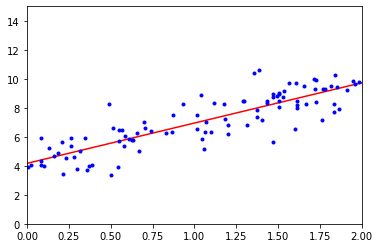

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
# Linear regression using sklearn

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.16990622],
       [9.72898775]])

In [12]:
# using lest square function
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond= 1e-6) 
theta_best_svd

array([[4.16990622],
       [2.77954077]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.16990622],
       [2.77954077]])

In [15]:
# Gradient Descent - you start filling random values of Theta and find cost function (MSE) for each value,
# then you improve it gradually in attempt to decrese the cost function further till it reaches 0 or minimum.

eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

# Finding partial deravatives of cost function
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

theta

array([[4.16990622],
       [2.77954077]])

In [16]:
# Stochastic Gradient Descent

# Learning rate scheduler - it gradually decreases learning rate so that we reach global minima

n_epochs = 50
t0, t1 = 5,50 #learning schedule hyperparametrs

def learning_schedule(t):
  return t0 / (t +t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index: random_index+1]
    yi = y[random_index: random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m+1)
    theta = theta - eta * gradients



In [17]:
theta


array([[4.16050459],
       [2.76814142]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.25440054]), array([2.90362583]))

# Polynomial Regression

Working with non-linear data

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) -3
y = 0.5 * X** 2 + X+2 + np.random.randn(m, 1)


In [23]:
# Transform data into linear data

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-1.31249918])

In [24]:
X_poly[0] # contains orignal features of x and square of this feature

array([-1.31249918,  1.72265408])

In [25]:
# fit a linear regression line

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09170135]), array([[0.93823048, 0.50781454]]))

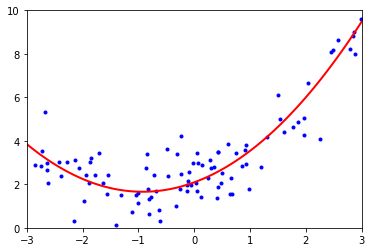

In [30]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "Prediction")

plt.axis([-3, 3, 0, 10])
plt.show()

In [35]:
# Learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict =  model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  
  plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
  plt.legend()
  plt.xlabel("Training set")
  plt.ylabel("RMSE")



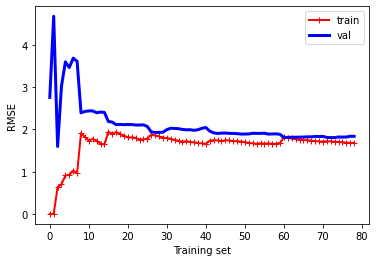

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X , y)

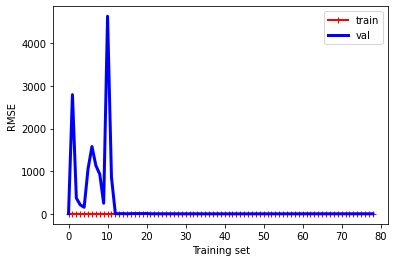

In [38]:
# Lerning curve of 10 degree polynomial

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("Poly_features", PolynomialFeatures(degree = 10, include_bias = False)), ("lin_reg", LinearRegression()),])

plot_learning_curves(polynomial_regression, X, y)

In [39]:
# Redge regression

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[4.84296126]])

In [40]:
# Using Stochastic Gradient Descent

sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82465474])

In [42]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.78487723])

In [44]:
# Elastic Net

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.78646588])

In [57]:
# Early Stopping
X_train, X_val, y_train, y_val  = train_test_split(X, y, test_size = 0.2)

from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree = 90, include_bias = False)), ("std_scaler", StandardScaler())])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)






In [46]:
# Logistic Regression
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [47]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [48]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

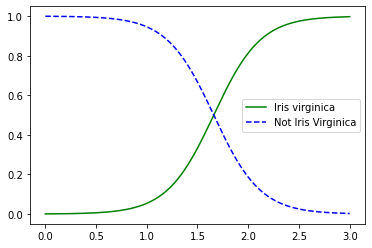

In [51]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris virginica")
plt.plot(X_new, y_proba[:,0], "b--", label = "Not Iris Virginica")
plt.legend()

In [52]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [54]:
X = iris['data'][:, (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C= 10)
softmax_reg.fit(X,y)


LogisticRegression(C=10, multi_class='multinomial')

In [55]:
softmax_reg.predict([[5,2]])

array([2])

In [56]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])